In [3]:
# reload the python scripts after modification without having to restart the notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# from this library
from course_2_path_finding.simple_env import SimpleEnvironment
import course_2_path_finding.grid_space_partitioning as grd_prt
import course_2_path_finding.algo_path_finding as algo_pf


# Define the environment and add objects 

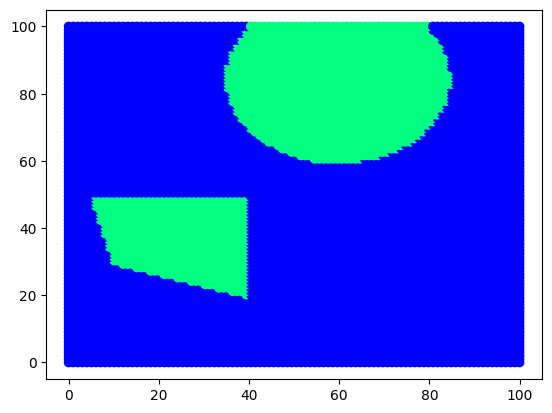

In [5]:
# Define a continuous environment with objects within
simple_env = SimpleEnvironment([0, 0, 100, 100], 100)
simple_env.add_disc(np.array([60, 85]), 25)
simple_env.add_convex_polygon(np.array([[10,30],[5,50],[40,50],[40,20]]))

# A discrete representation of the env to check that the objects were correctly added
simple_env.plot_map()

# Space partitioning

## Grid space partitioning

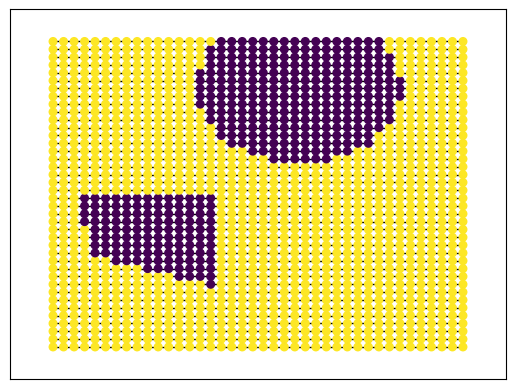

In [6]:
nelemx,nelemy = 40,40
G = grd_prt.generate_grid_graph(simple_env, grid_bounds=[0,0,100,100],nelemx=nelemx,nelemy=nelemy)

# probe the environment to know where an object is
grd_prt.check_available(simple_env,G)
# node size should be changed if nelemx and nelemy are modified
nx.draw_networkx(G,pos=nx.get_node_attributes(G, "coords"), node_size=30,with_labels=False,node_color=list(nx.get_node_attributes(G, "available").values()))

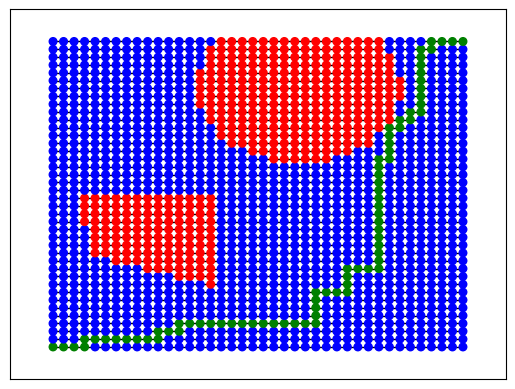

In [7]:
# Find the shortest path between start_node and end_node 
start_node = (0,0)
end_node = (nelemx-1,nelemy-1)

path = algo_pf.path_finding_djisktra(G,start_node,end_node)
grd_prt.color_path_and_graph(simple_env,G,path)
nx.draw_networkx(G,pos=nx.get_node_attributes(G, "coords"),node_size=30,with_labels=False,node_color=list(nx.get_node_attributes(G, "color").values()))

In [ ]:


def add_disc(centers_coords: np.array, radius: float, N_vertices=5):
    assert centers_coords.shape == (2,)

    theta = 2*np.pi/N_vertices
    ori_point_coords = centers_coords+np.array([radius,0])

    rotation_matrix = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    points_coords = [(rotation_matrix**n @ ori_point_coords.T).T for n in range(N_vertices)]
    

